# DiabNet training results

The full training procedure trained DiabNet for different SNPs datasets.

There are three sets with 1000 SNPs, each has been defined:

- associated SNPs;
- not associated SNPs;
- random SNPs or randomly choosen SNPs.

Besides these sets, we made another four syntetic datasets derived from the associated SNPs set, that are:

- shuffled labels;
- shuffled ages;
- shuffled parent diagnosis;
- shuffled SNPs or shuffled associated SNPs.

These shuffled sets were used to analyze the importance of some features, e. g. labels, ages, parent diagnosis and SNPs. The great capacity of neural networks to fit data during training are well known. Thus, we are looking for the impact of this artificial noise on the inference of the validation subset.

The shuffled associated SNPs set was created to preserve the observed frequency for each SNP. With that, we reduced a possible bias present in the regularization parameters that could affect the training using both non-associated and random SNPs sets.

Here, we are going to plot and explore the metrics, i.e. loss and balanced accuracy, for these SNPs datasets.

---

## Imports and configuration

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Import required libraries
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Import custom functions
from diabnet.analysis.analysis import calculate_stats, get_metrics_from_log, plot_loss, plot_bacc

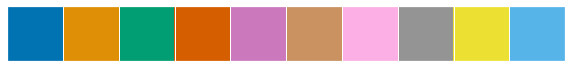

In [4]:
# Configuring color palette
sns.set()
colors = sns.color_palette("colorblind")
sns.palplot(colors)
sns.set_style("whitegrid")
sns.set_style("ticks", {"axes.grid": True, "grid.color": ".95", "grid.linestyle": "-"})

# Save plots to files
SAVE = True

# Verbosity
verbose = False

## Loading training results

In [5]:
# WARNINGS:
# - Make sure the log file pattern is correct
# - Make sure that the models trained are the ones listed in `models`

# Basedir for log files
logdir = "../results/logs"

# Trained models
models = [
    # "families",
    "negative",
    "positive",
    "random",
    "shuffled-ages",
    "shuffled-labels",
    "shuffled-parents",
    "shuffled-snps",
]

# Prepare data
data = dict(
    (
        model,
        calculate_stats(
            get_metrics_from_log(
                os.path.join(logdir, f"model-{model}-13-adamw-lc5-2021-03-03.log")
            )
        ),
    )
    for model in models
)

if verbose:
    print(data)

## Plot 1: associated, non-associated and random SNPs

[description]: What we find out with this plot?

The original datasets, i. e. associated, non-associated and random SNPs, have their loss function reduced over the epochs. However, the second and the latter present a difference between the training and validation losses, indicating that DiabNet may be overfitting is these scenarios.

The DiabNet trained with 1000 associated SNPs achieves a balanced accuracy of ~85%; however, for the DiabNet trained with 1000 non-associated and random SNPs, it achieves ~60% in both cases.

Interestingly, the results achieved by DiabNet with 1000 non-associated and random SNPs are similar.

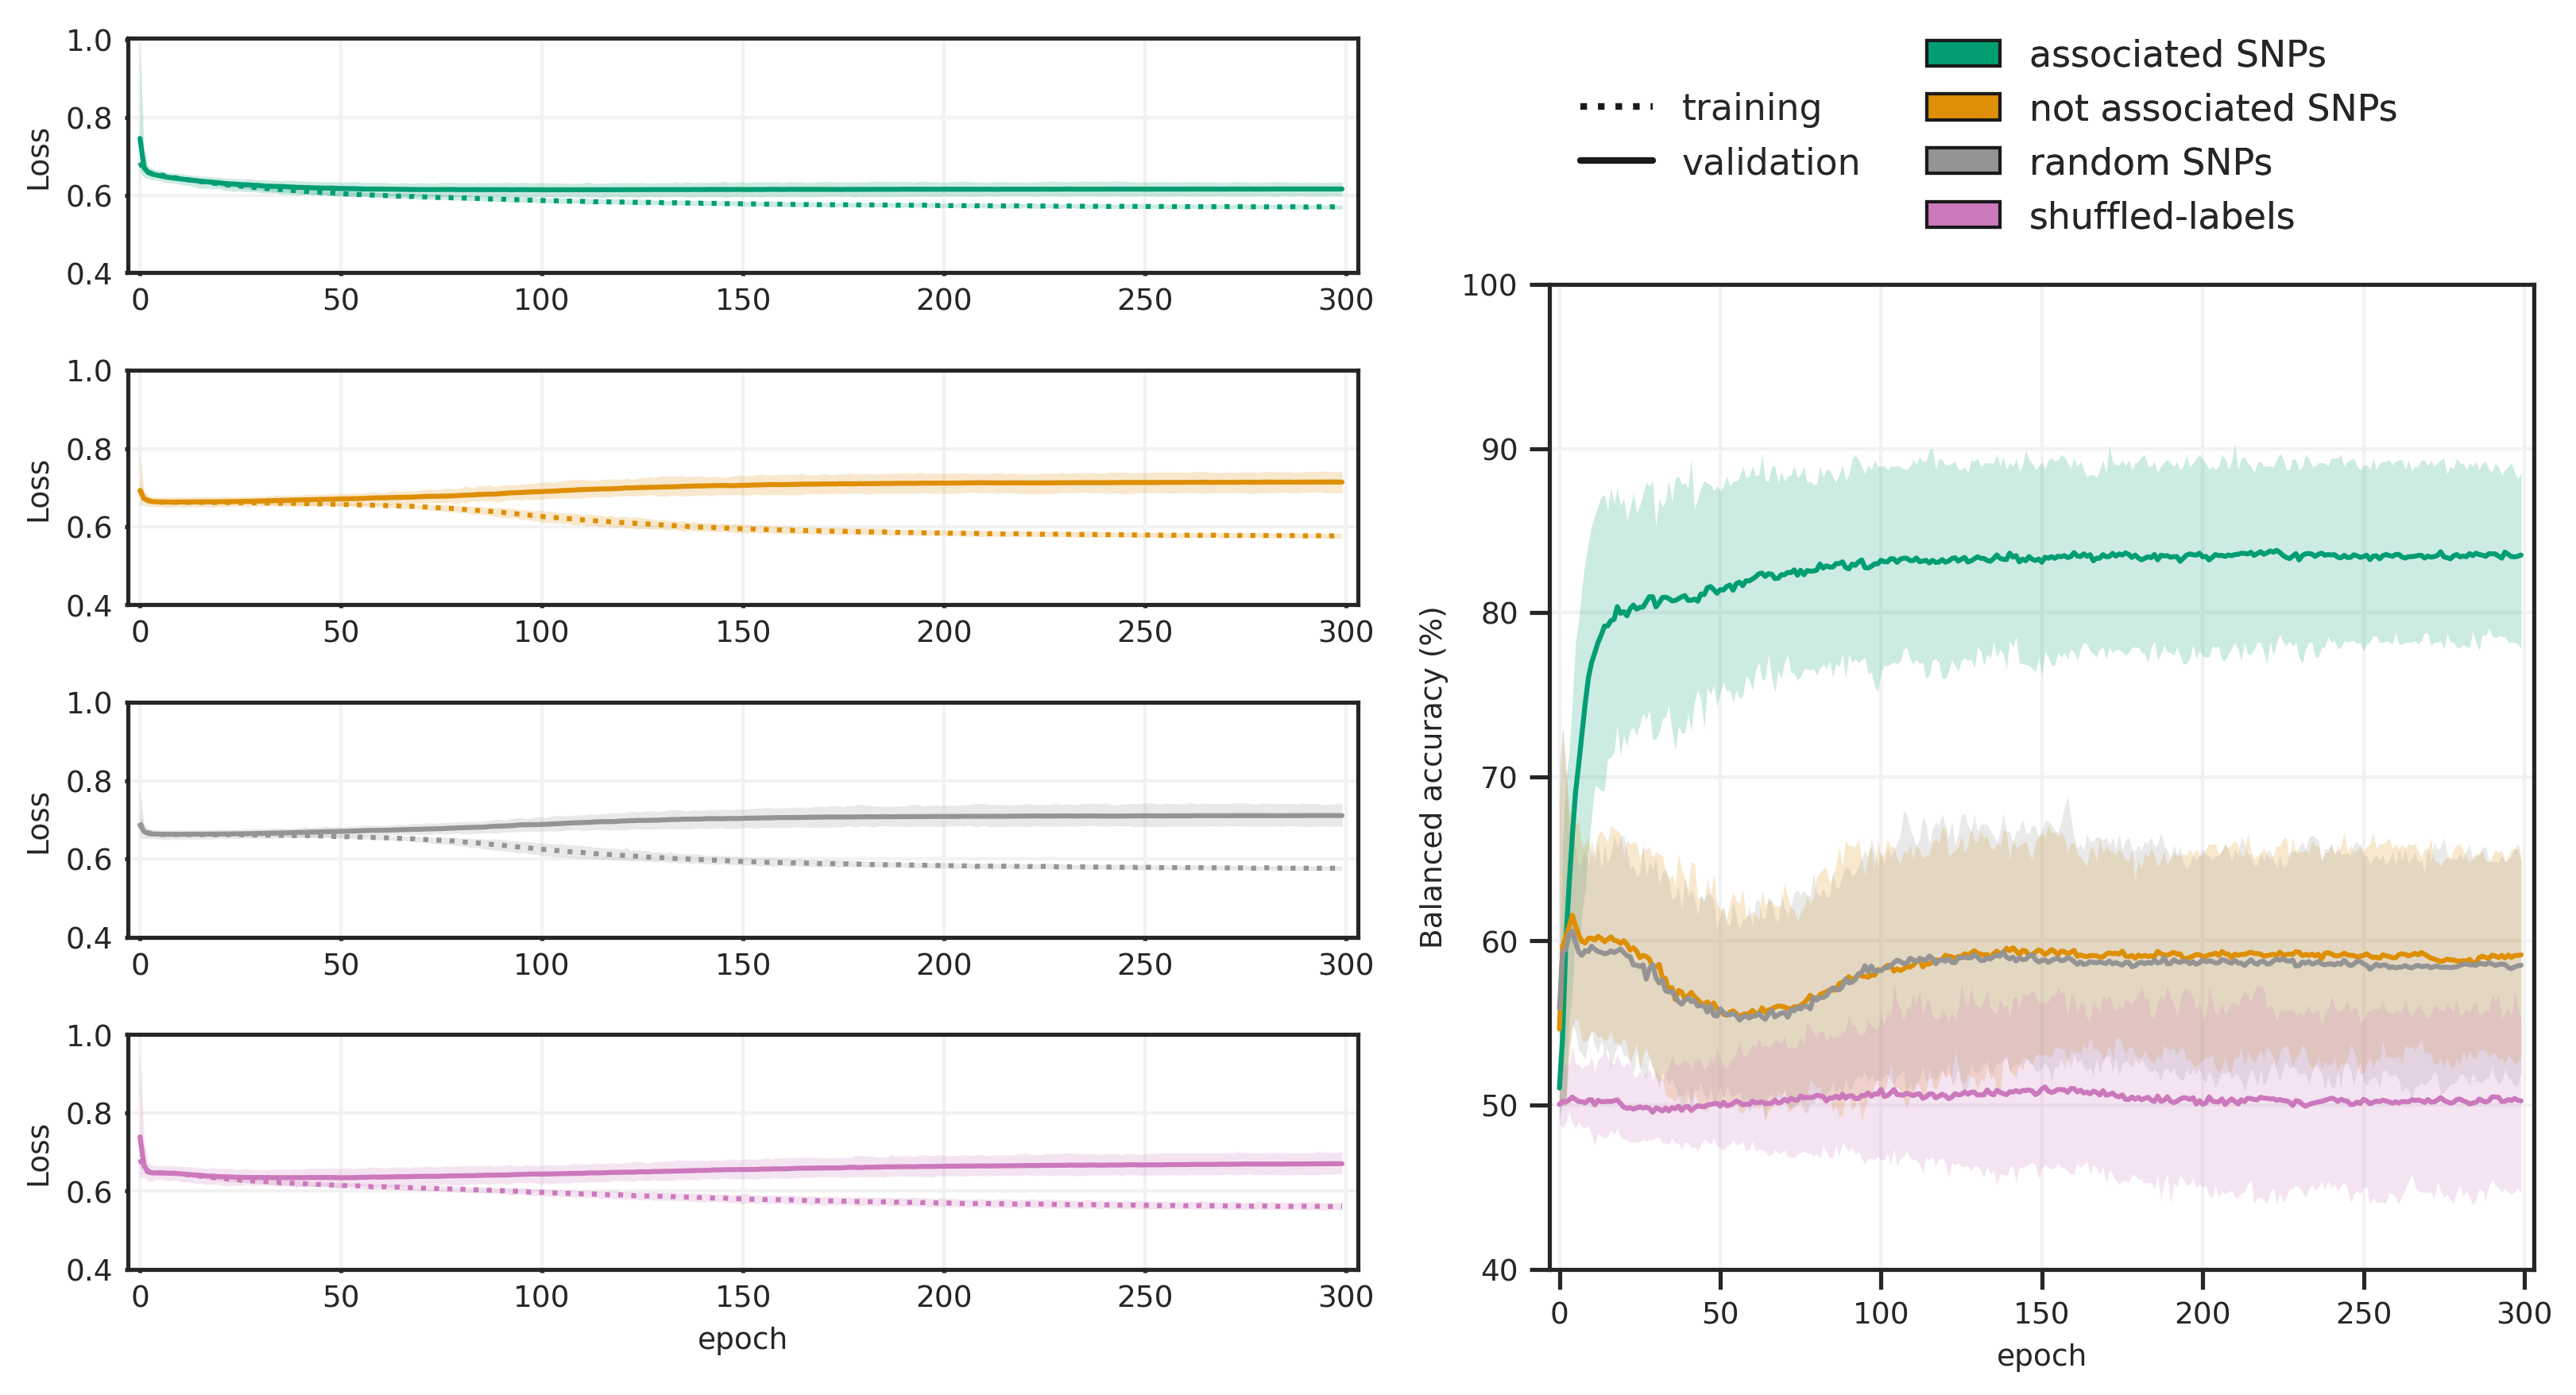

In [6]:
# Create figure
plt.figure(figsize=(12, 6), dpi=300)

# Plot loss
ax_l1 = plot_loss(data["positive"], plt.subplot(421), colors[2])
ax_l2 = plot_loss(data["negative"], plt.subplot(423), colors[1])
ax_l3 = plot_loss(data["random"], plt.subplot(425), colors[7])
ax_l4 = plot_loss(data["shuffled-labels"], plt.subplot(427), colors[4])

# Label
plt.xlabel("epoch", fontsize=9)

# Plot balanced accuracy
ax_r = plot_bacc(
    [data["positive"], data["negative"], data["random"], data["shuffled-labels"]],
    plt.subplot(122),
    [colors[2], colors[1], colors[7], colors[4]],
)

# Legend
legend_lines = [
    Line2D([0], [0], color="k", lw=2, ls=":", label="training"),
    Line2D([0], [0], color="k", lw=2, label="validation"),
]
legend_colors = [
    Patch(facecolor=colors[2], edgecolor="k", label="associated SNPs"),
    Patch(facecolor=colors[1], edgecolor="k", label="not associated SNPs"),
    Patch(facecolor=colors[7], edgecolor="k", label="random SNPs"),
    Patch(facecolor=colors[4], edgecolor="k", label="shuffled-labels"),
]

# Tight_layout
plt.tight_layout()

box = ax_r.get_position()
ax_r.set_position([box.x0, box.y0, box.width * 0.8, box.height * 0.8])
ax_r.add_artist(
    plt.legend(
        handles=legend_lines,
        loc="center right",
        frameon=False,
        bbox_to_anchor=(0.35, 1.15),
    )
)
ax_r.add_artist(
    plt.legend(
        handles=legend_colors,
        loc="center left",
        frameon=False,
        bbox_to_anchor=(0.35, 1.15),
    )
)

# Save figure to file
if SAVE:
    if not os.path.exists("./images"):
        os.makedirs("./images")
    plt.savefig("./images/notebook1-plot1.svg")

## Plot 2: Effects of shuffling features

[description]: What we find out with this plot?

The shuffled datasets, i. e. shuffled SNPs, shuffled ages, shuffled parents' diagnosis and shuffled labels, have their loss function reduced over the epochs. However, the first and the latter present a noticiable difference between the training and validation losses, indicating that DiabNet may be overfitting is these scenarios.

The DiabNet trained with 1000 associated SNPs achieves a balanced accuracy of ~85%. The shuffled datasets performed worse than it in all cases, except for the DiabNet trained with shuffled parents' diagnosis, indicating that the parents' diagnosis may not have a major contribution to DiabNet performance. The shuffled ages have less performance degradation on DiabNet compared to shuffled SNPs and shuffled labels, thus suggesting that the genetic background is more relevant to T2D diagnosis than the age of the subjects. Further, the shuffled SNPs performance indicates that the remaining 'correct' features have their contribution to DiabNet learning, which suggests age and parents' diagnosis are relevant to DiabNet. Finally, the shuffled labels reach the minimum possible balanced accuracy for a set of neural networks, that is, ~ 50%, indicating that DiabNet is guessing whether the subject has T2D or not.

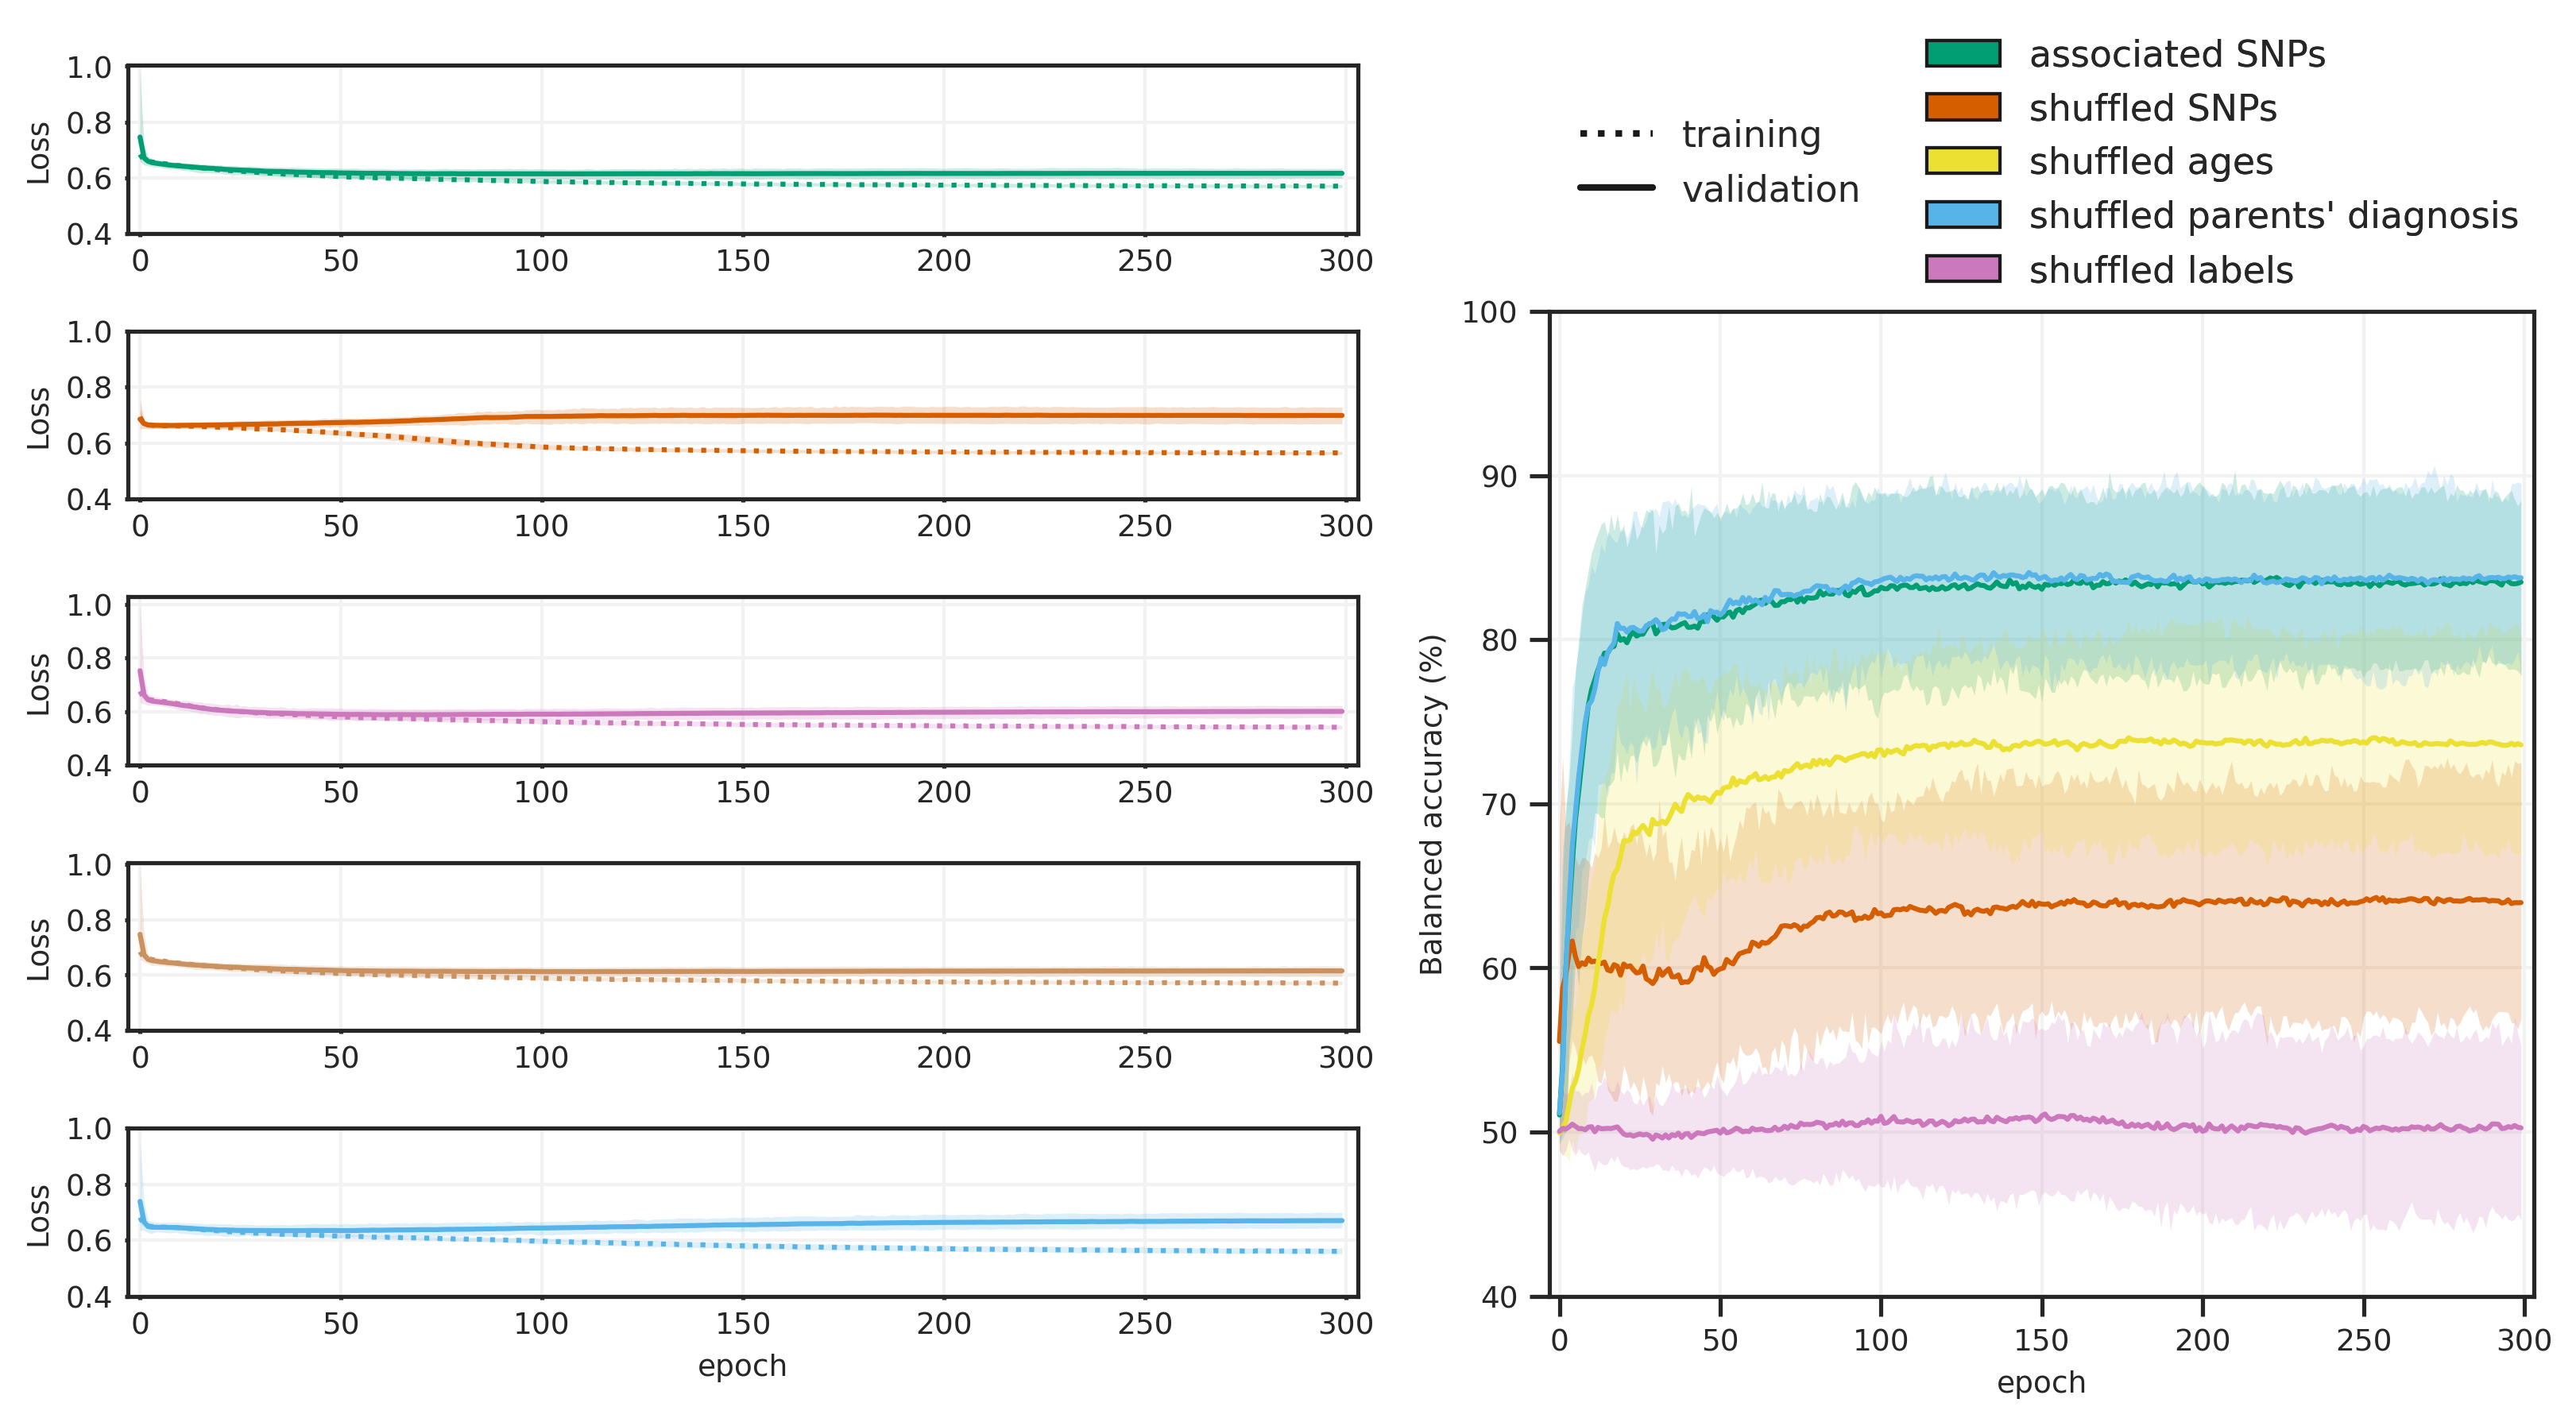

In [7]:
# Create figure
plt.figure(figsize=(12, 6), dpi=300)

# Plot loss
ax_l1 = plot_loss(data["positive"], plt.subplot(521), colors[2])
ax_l2 = plot_loss(data["shuffled-snps"], plt.subplot(523), colors[3])
ax_l3 = plot_loss(data["shuffled-ages"], plt.subplot(525), colors[4])
ax_l4 = plot_loss(data["shuffled-parents"], plt.subplot(527), colors[5])
ax_l5 = plot_loss(data["shuffled-labels"], plt.subplot(529), colors[9])

# Label
plt.xlabel("epoch", fontsize=9)

# Plot balanced accuracy
ax_r = plot_bacc(
    [
        data["positive"],
        data["shuffled-snps"],
        data["shuffled-ages"],
        data["shuffled-parents"],
        data["shuffled-labels"],
    ],
    plt.subplot(122),
    [colors[2], colors[3], colors[8], colors[9], colors[4]],
)

# Legend
legend_lines = [
    Line2D([0], [0], color="k", lw=2, ls=":", label="training"),
    Line2D([0], [0], color="k", lw=2, label="validation"),
]
legend_colors = [
    Patch(facecolor=colors[2], edgecolor="k", label="associated SNPs"),
    Patch(facecolor=colors[3], edgecolor="k", label="shuffled SNPs"),
    Patch(facecolor=colors[8], edgecolor="k", label="shuffled ages"),
    Patch(facecolor=colors[9], edgecolor="k", label="shuffled parents' diagnosis"),
    Patch(facecolor=colors[4], edgecolor="k", label="shuffled labels"),
]

# Tight_layout
plt.tight_layout()

box = ax_r.get_position()
ax_r.set_position([box.x0, box.y0, box.width * 0.8, box.height * 0.8])
ax_r.add_artist(
    plt.legend(
        handles=legend_lines,
        loc="center right",
        frameon=False,
        bbox_to_anchor=(0.35, 1.15),
    )
)
ax_r.add_artist(
    plt.legend(
        handles=legend_colors,
        loc="center left",
        frameon=False,
        bbox_to_anchor=(0.35, 1.15),
    )
)

# Save figure to file
if SAVE:
    if not os.path.exists("./images"):
        os.makedirs("./images")
    plt.savefig("./images/notebook1-plot2.svg")

## Plot 3: Balanced accuracy of SNPs datasets

[description]: What we find out with this plot?

In addition to the conclusion drawn from the previous plots (Plot 1 and Plot 2), we notice a similar behavior between the original datasets and the shuffled ones. The associated SNPs and shuffled parents' diagnosis have a similar behaviour, reaching ~85% balanced accuracy. On the other hand, the not associated and random SNPs datasets behave similarly to the shuffled SNPs dataset, which states the relevance of selecting T2D-associated SNPs.

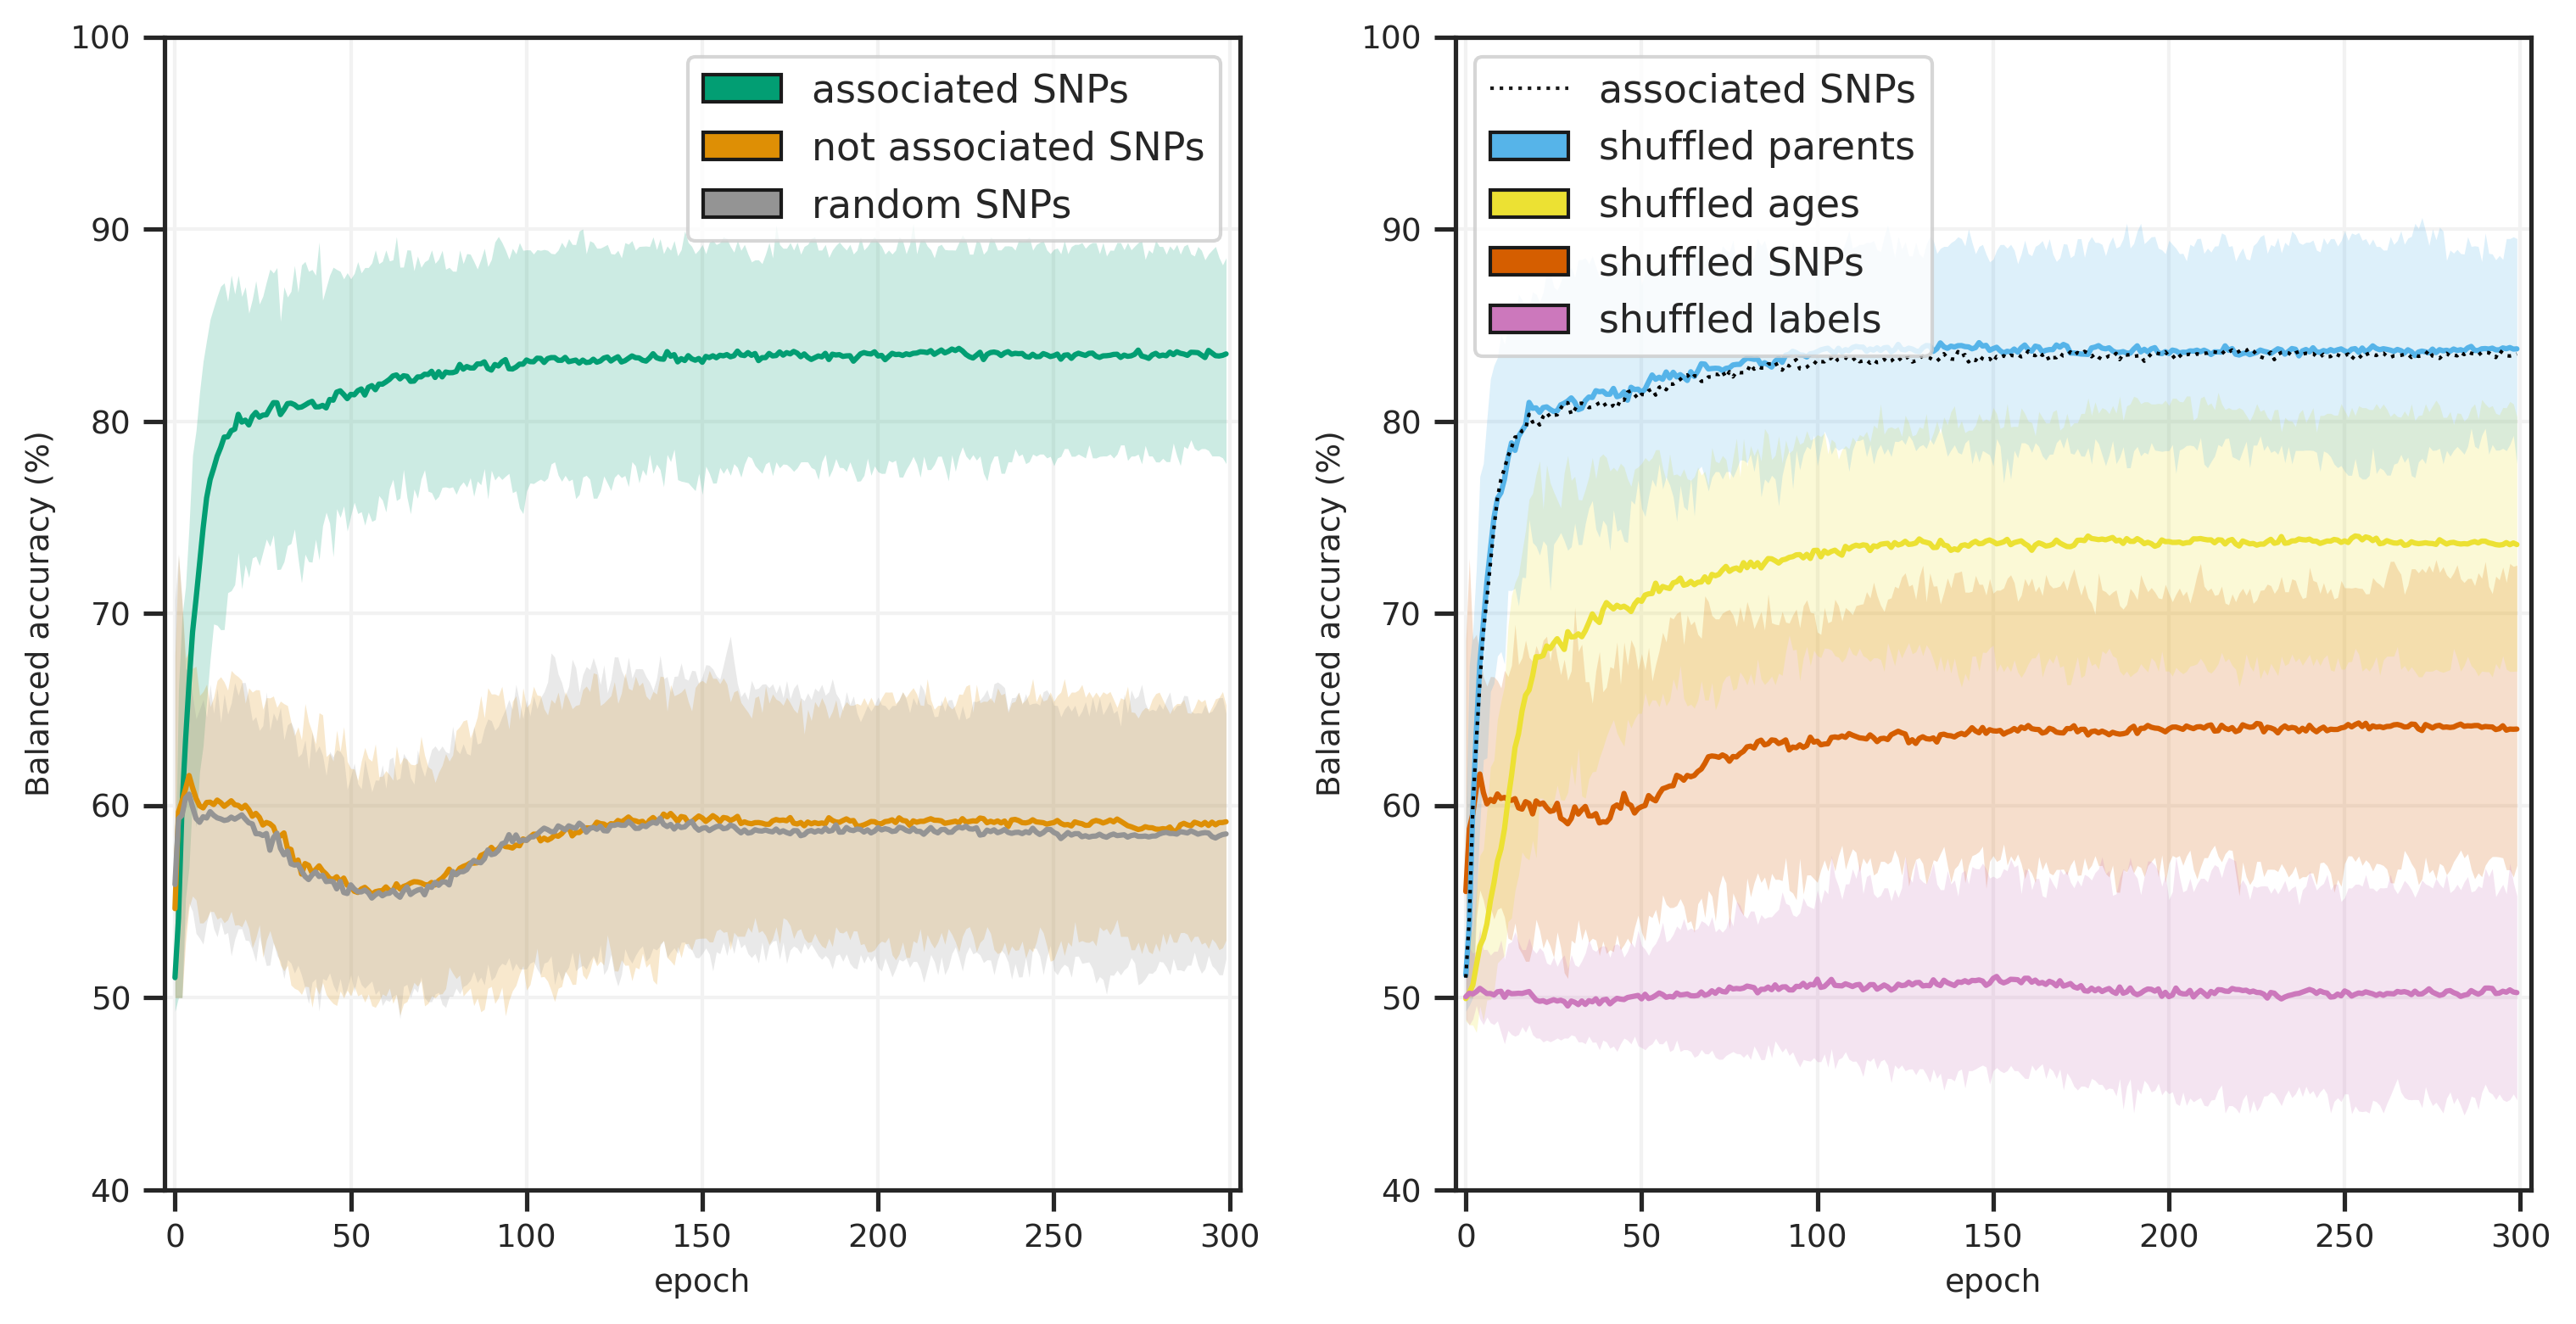

In [8]:
# Create figure
plt.figure(figsize=(12, 6), dpi=300)

# Plot bacc of original datasets
ax_c1 = plot_bacc(
    [data["positive"], data["negative"], data["random"]],
    plt.subplot(121),
    [colors[2], colors[1], colors[7]],
)
legend_colors_1 = [
    Patch(facecolor=colors[2], edgecolor="k", label="associated SNPs"),
    Patch(facecolor=colors[1], edgecolor="k", label="not associated SNPs"),
    Patch(facecolor=colors[7], edgecolor="k", label="random SNPs"),
]
ax_c1.legend(handles=legend_colors_1, loc="best")

# Plot bacc of synthetic datasets
ax_c2 = plot_bacc(
    [
        data["shuffled-snps"],
        data["shuffled-ages"],
        data["shuffled-parents"],
        data["shuffled-labels"],
    ],
    plt.subplot(122),
    [colors[3], colors[8], colors[9], colors[4]],
)
ax_c2.plot(data["positive"][0]["balanced_accuracy"] * 100, color="black", lw=1, ls=":")

# Legend
legend_colors_2 = [
    Line2D([0], [0], color="k", lw=1, ls=":", label="associated SNPs"),
    Patch(facecolor=colors[9], edgecolor="k", label="shuffled parents"),
    Patch(facecolor=colors[8], edgecolor="k", label="shuffled ages"),
    Patch(facecolor=colors[3], edgecolor="k", label="shuffled SNPs"),
    Patch(facecolor=colors[4], edgecolor="k", label="shuffled labels"),
]

ax_c2.legend(handles=legend_colors_2, loc="best")

# Save figure to file
if SAVE:
    if not os.path.exists("./images"):
        os.makedirs("./images")
    plt.savefig("./images/notebook1-plot3.svg")